In [1]:
from __future__ import division, print_function
%matplotlib nbagg
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['image.cmap'] = 'gist_earth'

In [2]:
import matplotlib.pyplot as plt

In [3]:
import matplotlib.pyplot as plt

In [4]:
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util

/home/jericho/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
nx = 572
ny = 572


In [6]:
generator = image_gen.GrayScaleDataProvider(nx, ny, cnt=20)

In [7]:
x_test, y_test = generator(1)

<IPython.core.display.Javascript object>


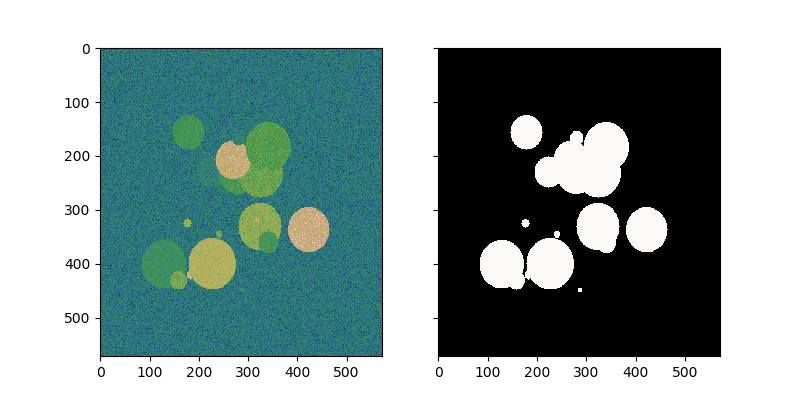

In [8]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")

In [9]:
net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=16)

2018-05-31 16:33:27,582 Layers 3, features 16, filter size 3x3, pool size: 2x2


AttributeError: module 'tensorflow.python.ops.nn' has no attribute 'softmax_cross_entropy_with_logits_v2'

In [9]:
import tensorflow as tf
help(tf)

Help on package tensorflow:

NAME
    tensorflow

DESCRIPTION
    # Copyright 2015 The TensorFlow Authors. All Rights Reserved.
    #
    # Licensed under the Apache License, Version 2.0 (the "License");
    # you may not use this file except in compliance with the License.
    # You may obtain a copy of the License at
    #
    #     http://www.apache.org/licenses/LICENSE-2.0
    #
    # Unless required by applicable law or agreed to in writing, software
    # distributed under the License is distributed on an "AS IS" BASIS,
    # WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
    # See the License for the specific language governing permissions and
    # limitations under the License.
    # ==============================================================================

PACKAGE CONTENTS
    contrib (package)
    core (package)
    examples (package)
    libtensorflow_framework
    python (package)
    tensorboard (package)
    tools (package)

SUBMODULES
    

In [8]:
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

In [9]:
path = trainer.train(generator, "./unet_trained", training_iters=20, epochs=10, display_step=2)

2017-03-27 21:11:51,941 Removing '/Users/jakeret/workspace/tf_unet/demo/prediction'
2017-03-27 21:11:51,944 Removing '/Users/jakeret/workspace/tf_unet/demo/unet_trained'
2017-03-27 21:11:51,946 Allocating '/Users/jakeret/workspace/tf_unet/demo/prediction'
2017-03-27 21:11:51,947 Allocating '/Users/jakeret/workspace/tf_unet/demo/unet_trained'
2017-03-27 21:12:00,946 Verification error= 19.4%, loss= 0.6514
2017-03-27 21:12:04,516 Start optimization
2017-03-27 21:12:09,380 Iter 0, Minibatch Loss= 0.6272, Training Accuracy= 0.7682, Minibatch error= 23.2%
2017-03-27 21:12:17,544 Iter 2, Minibatch Loss= 0.5162, Training Accuracy= 0.8452, Minibatch error= 15.5%
2017-03-27 21:12:25,593 Iter 4, Minibatch Loss= 0.4626, Training Accuracy= 0.8439, Minibatch error= 15.6%
2017-03-27 21:12:33,677 Iter 6, Minibatch Loss= 0.4321, Training Accuracy= 0.8621, Minibatch error= 13.8%
2017-03-27 21:12:41,630 Iter 8, Minibatch Loss= 0.4044, Training Accuracy= 0.8681, Minibatch error= 13.2%
2017-03-27 21:12:49

In [22]:
x_test, y_test = generator(1)

prediction = net.predict("./unet_trained/model.ckpt", x_test)

2017-03-27 21:31:00,595 Model restored from file: ./unet_trained/model.ckpt


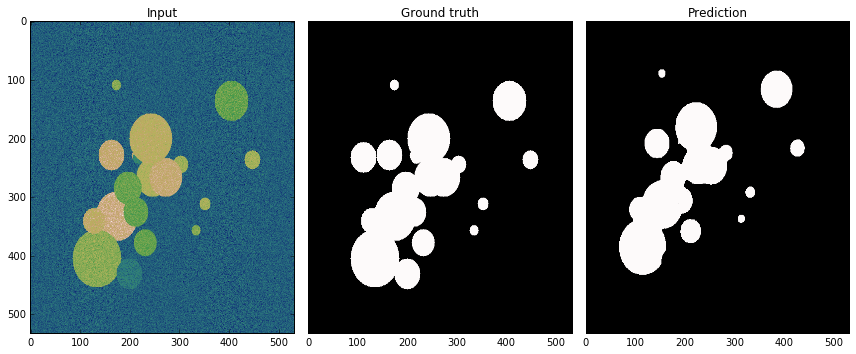

In [23]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()
fig.savefig("../docs/toy_problem.png")